# Working with timeseries data 

In [4]:
import pandas as pd

## Reading timeseries data: Weather station data

In this example, we will se NOAA weather station data that I downloaded from Climate Data Online. We are using data from [Charlottesville-Albemarle Airport](https://www.ncei.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00093736/detail). In this particular daily summaries are archived. 

We read the data like in previous examples. With no options, this is what we get.

In [5]:
datafile = r'../Data/CDO_USW00093736_1955_2025.txt'
df = pd.read_csv(datafile)
df.head()

,STATION ELEVATION LATITUDE LONGITUDE DATE PRCP SNWD SNOW TAVG TMAX TMIN AWND WDF2 WDF5 WSF2 WSF5
0,----------------- ---------- ---------- ------...
1,GHCND:USW00093736 194.8 38.14 -7...
2,GHCND:USW00093736 194.8 38.14 -7...
3,GHCND:USW00093736 194.8 38.14 -7...
4,GHCND:USW00093736 194.8 38.14 -7...


Pandas did not separate the data into different columns. This is because it was expecting a standard csv file with comma separated values. However, in our file the data is separated by multiple whitespaces. We can let pandas know by using the `sep` keyword. `\s` indicates a whitespace and the `+` is for multiple. 

We also see that the first row in the dataset does not contain any data. We use the `skiprows` keyword to indicate that the second-row (1st when counting from zero) does not have any data. As a standard, pandas assumes that the first row contains the column-headers. 

In [6]:
df = pd.read_csv(datafile, sep=r'\s+', skiprows= [1])
df.head()

,STATION,ELEVATION,LATITUDE,LONGITUDE,DATE,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5
0,GHCND:USW00093736,194.8,38.14,-78.45,19560101,-9999.0,-9999.0,-9999.0,-9999.0,10.0,-1.7,-9999.0,-9999,-9999,-9999.0,-9999.0
1,GHCND:USW00093736,194.8,38.14,-78.45,19560102,-9999.0,-9999.0,-9999.0,-9999.0,4.4,-3.9,-9999.0,-9999,-9999,-9999.0,-9999.0
2,GHCND:USW00093736,194.8,38.14,-78.45,19560103,-9999.0,-9999.0,-9999.0,-9999.0,12.8,0.6,-9999.0,-9999,-9999,-9999.0,-9999.0
3,GHCND:USW00093736,194.8,38.14,-78.45,19560104,-9999.0,-9999.0,-9999.0,-9999.0,8.9,-2.8,-9999.0,-9999,-9999,-9999.0,-9999.0
4,GHCND:USW00093736,194.8,38.14,-78.45,19560105,-9999.0,-9999.0,-9999.0,-9999.0,11.7,0.0,-9999.0,-9999,-9999,-9999.0,-9999.0


This looks much better. We also see that there are lots of `-9999` and `-9999.0` values. The [CDO documentation](https://www.ncei.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf) tells us that these are used to identify missing data, so we can let pandas know.  

In [9]:
df = pd.read_csv(datafile, sep=r'\s+', skiprows= [1], na_values= [-9999, -9999.0])
df.head()

,STATION,ELEVATION,LATITUDE,LONGITUDE,DATE,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5
0,GHCND:USW00093736,194.8,38.14,-78.45,19560101,NaN,NaN,NaN,NaN,10.0,-1.7,NaN,NaN,NaN,NaN,NaN
1,GHCND:USW00093736,194.8,38.14,-78.45,19560102,NaN,NaN,NaN,NaN,4.4,-3.9,NaN,NaN,NaN,NaN,NaN
2,GHCND:USW00093736,194.8,38.14,-78.45,19560103,NaN,NaN,NaN,NaN,12.8,0.6,NaN,NaN,NaN,NaN,NaN
3,GHCND:USW00093736,194.8,38.14,-78.45,19560104,NaN,NaN,NaN,NaN,8.9,-2.8,NaN,NaN,NaN,NaN,NaN
4,GHCND:USW00093736,194.8,38.14,-78.45,19560105,NaN,NaN,NaN,NaN,11.7,0.0,NaN,NaN,NaN,NaN,NaN


Great. The missing data is now represented by `NaN`.

What data types did pandas infer?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25554 entries, 0 to 25553
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    25554 non-null  object 
 1   ELEVATION  25554 non-null  float64
 2   LATITUDE   25554 non-null  float64
 3   LONGITUDE  25554 non-null  float64
 4   DATE       25554 non-null  int64  
 5   PRCP       23343 non-null  float64
 6   SNWD       5958 non-null   float64
 7   SNOW       5970 non-null   float64
 8   TAVG       2831 non-null   float64
 9   TMAX       25498 non-null  float64
 10  TMIN       25496 non-null  float64
 11  AWND       9914 non-null   float64
 12  WDF2       9919 non-null   float64
 13  WDF5       9899 non-null   float64
 14  WSF2       9920 non-null   float64
 15  WSF5       9901 non-null   float64
dtypes: float64(14), int64(1), object(1)
memory usage: 3.1+ MB


Do you notice a problem. The `DATE` column was read as an integer, which means that pandas did not understand that this is a date. 

So, January 1st 1956 became `19560101` 

We need to explicitly tell pandas, which columns should be understood as dates:

In [14]:
df = pd.read_csv(datafile, sep=r'\s+',
                 na_values=[-9999.0, -99.0],
                 skiprows = [1],
                 parse_dates=[4])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25554 entries, 0 to 25553
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    25554 non-null  object        
 1   ELEVATION  25554 non-null  float64       
 2   LATITUDE   25554 non-null  float64       
 3   LONGITUDE  25554 non-null  float64       
 4   DATE       25554 non-null  datetime64[ns]
 5   PRCP       23343 non-null  float64       
 6   SNWD       5958 non-null   float64       
 7   SNOW       5970 non-null   float64       
 8   TAVG       2831 non-null   float64       
 9   TMAX       25498 non-null  float64       
 10  TMIN       25496 non-null  float64       
 11  AWND       9914 non-null   float64       
 12  WDF2       9919 non-null   float64       
 13  WDF5       9899 non-null   float64       
 14  WSF2       9920 non-null   float64       
 15  WSF5       9901 non-null   float64       
dtypes: datetime64[ns](1), float64(14), objec

That worked. 

## Time indices 

Indexes are very powerful. They are a big part of why Pandas is so useful. There are different indices for different types of data. Time Indexes are especially great!

We now set the date column as the index for our dataframe.

In [15]:
df = df.set_index('DATE')
df.head()

,STATION,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5
DATE,,,,,,,,,,,,,,,
1956-01-01,GHCND:USW00093736,194.8,38.14,-78.45,NaN,NaN,NaN,NaN,10.0,-1.7,NaN,NaN,NaN,NaN,NaN
1956-01-02,GHCND:USW00093736,194.8,38.14,-78.45,NaN,NaN,NaN,NaN,4.4,-3.9,NaN,NaN,NaN,NaN,NaN
1956-01-03,GHCND:USW00093736,194.8,38.14,-78.45,NaN,NaN,NaN,NaN,12.8,0.6,NaN,NaN,NaN,NaN,NaN
1956-01-04,GHCND:USW00093736,194.8,38.14,-78.45,NaN,NaN,NaN,NaN,8.9,-2.8,NaN,NaN,NaN,NaN,NaN
1956-01-05,GHCND:USW00093736,194.8,38.14,-78.45,NaN,NaN,NaN,NaN,11.7,0.0,NaN,NaN,NaN,NaN,NaN


The TimeIndex object has lots of useful attributes. Below are some examples:


In [22]:
df.index.month

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype='int32', name='DATE', length=25554)

In [102]:
df.index.year

Index([1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956,
       ...
       2026, 2026, 2026, 2026, 2026, 2026, 2026, 2026, 2026, 2026],
      dtype='int32', name='DATE', length=25554)

In [ ]:
df.index.day_of_week

Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       ...
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4],
      dtype='int32', name='DATE', length=25554)

We can also use the time index to calculate the length of a period. 

In [104]:
df.index[10] - df.index[0] 

Timedelta('10 days 00:00:00')

In [36]:
(df.index[10] - df.index[0]).total_seconds() 

864000.0

### Accessing data through the time index

We can now access values by time:

In [25]:
df.loc['2017-05-17']

STATION      GHCND:USW00093736
ELEVATION                192.3
LATITUDE               38.1374
LONGITUDE            -78.45513
PRCP                       0.0
SNWD                       NaN
SNOW                       NaN
TAVG                       NaN
TMAX                      33.9
TMIN                      15.6
AWND                       3.7
WDF2                     190.0
WDF5                     210.0
WSF2                       8.9
WSF5                      11.2
Name: 2017-05-17 00:00:00, dtype: object

Or use slicing to get a range:

## Plotting data

Pandas is very "time aware" and will format the axis of our plot accordingly. 

<Axes: xlabel='DATE'>

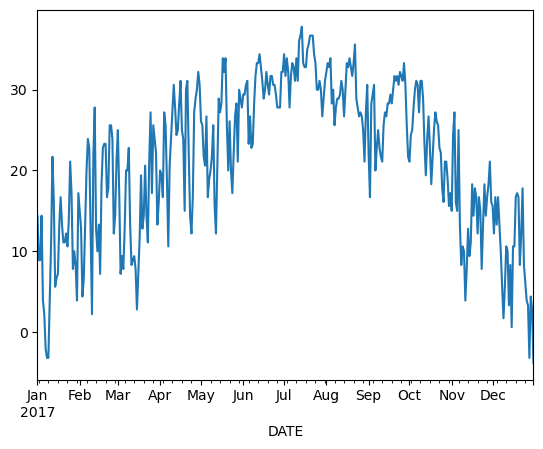

In [30]:
df.loc['2017-01-01':'2017-12-31', 'TMAX'].plot()

## Aggregating data

This timeseries has daily resolution, and the daily plots can be very noisy. 

In [28]:
df.loc['2017-07-01':'2017-07-31']

,STATION,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5
DATE,,,,,,,,,,,,,,,
2017-07-01,GHCND:USW00093736,192.3,38.1374,-78.45513,0.0,NaN,NaN,NaN,34.4,23.3,2.7,190.0,120.0,6.7,8.9
2017-07-02,GHCND:USW00093736,192.3,38.1374,-78.45513,0.0,NaN,NaN,NaN,31.7,20.6,1.5,200.0,210.0,5.8,8.1
2017-07-03,GHCND:USW00093736,192.3,38.1374,-78.45513,0.0,NaN,NaN,NaN,33.9,19.4,0.9,210.0,210.0,5.4,6.3
2017-07-04,GHCND:USW00093736,192.3,38.1374,-78.45513,0.3,NaN,NaN,NaN,32.2,21.1,0.8,210.0,200.0,4.0,5.4
2017-07-05,GHCND:USW00093736,192.3,38.1374,-78.45513,5.3,NaN,NaN,NaN,27.8,22.2,2.0,80.0,60.0,6.3,8.1
2017-07-06,GHCND:USW00093736,192.3,38.1374,-78.45513,0.5,NaN,NaN,NaN,31.7,21.7,1.3,210.0,60.0,5.8,6.7
2017-07-07,GHCND:USW00093736,192.3,38.1374,-78.45513,0.0,NaN,NaN,NaN,33.3,22.8,1.7,200.0,210.0,5.8,8.5
2017-07-08,GHCND:USW00093736,192.3,38.1374,-78.45513,0.0,NaN,NaN,NaN,32.8,20.0,1.6,320.0,330.0,5.8,8.1
2017-07-09,GHCND:USW00093736,192.3,38.1374,-78.45513,0.0,NaN,NaN,NaN,31.1,17.2,0.9,160.0,160.0,5.4,6.3


<Axes: xlabel='DATE'>

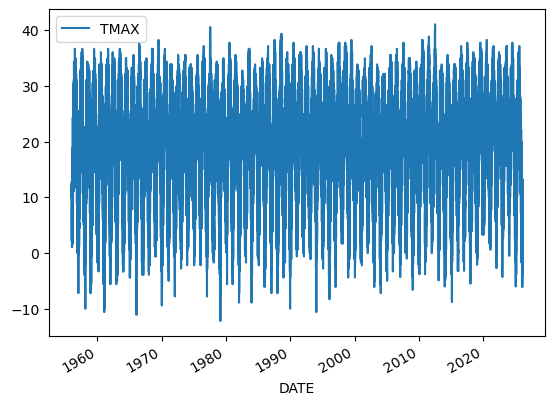

In [31]:
df.plot(y='TMAX')   

Aggregating our data will help us reduce the noise. 

### Resampling data

A common operation is to change the resolution of a dataset by resampling in time. Pandas exposes this through the [resample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) function. The resample periods are specified using pandas offset index syntax.

Below we resample the dataset by getting the data for every year. `YS` stands for `year start`. A full list of these so-called _offset aliases_ is found in the [pandas timeseries documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).

In [33]:
yearly_df=df[['TMIN', 'TMAX']].resample('YS').mean()
yearly_df.head()

,TMIN,TMAX
DATE,,
1956-01-01,9.924501,19.512821
1957-01-01,10.489779,19.036464
1958-01-01,8.379614,17.766391
1959-01-01,9.181096,19.614247
1960-01-01,8.561749,18.340984


<Axes: xlabel='DATE'>

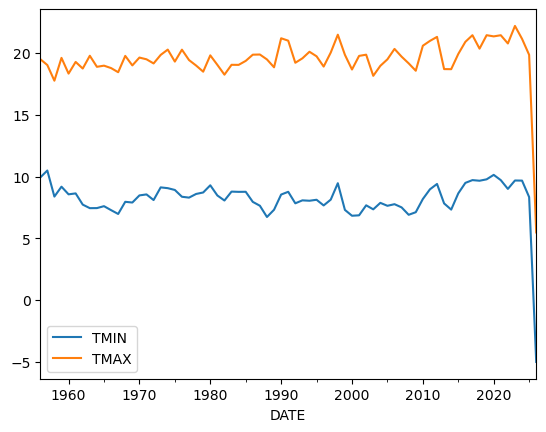

In [34]:
yearly_df.plot()

This looks much less noisy, and we could for example now think about whether there is a trend in our dataset. 

### Groupby

We have already seen how powerful the `.groupby()` operation is. 

A common way to analyze weather data in climate science is to create a “climatology,” which contains the average values in each month or day of the year. We can do this easily with `.groupby()`. Recall that df.index is a pandas `DateTimeIndex` object.

In [35]:
monthly_climatology  = df[['TMIN', 'TMAX']].groupby(df.index.month).mean()
monthly_climatology 

,TMIN,TMAX
DATE,,
1,-2.707156,7.235597
2,-1.510136,9.175895
3,2.457680,14.229545
4,7.643440,20.404322
5,12.485556,24.526753
6,17.079532,28.774678
7,19.510906,30.701017
8,18.657407,29.771930
9,14.877751,26.253037


Each row in this new dataframe respresents the average values for the months (1=January, 2=February, etc.)

We can apply more customized aggregations. These can be specified using `.aggregate()`. Below we keep the max of the `TMAX` column, and min of `TMIN` column for the temperature measurements.

In [36]:
monthly_T_climatology = df.groupby(df.index.month).aggregate({'TMAX': 'max',
                                                              'TMIN': 'min'})
monthly_T_climatology.head()

,TMAX,TMIN
DATE,,
1,27.2,-21.1
2,27.8,-19.4
3,32.8,-17.1
4,34.4,-5.6
5,36.1,-1.7


<Axes: xlabel='DATE'>

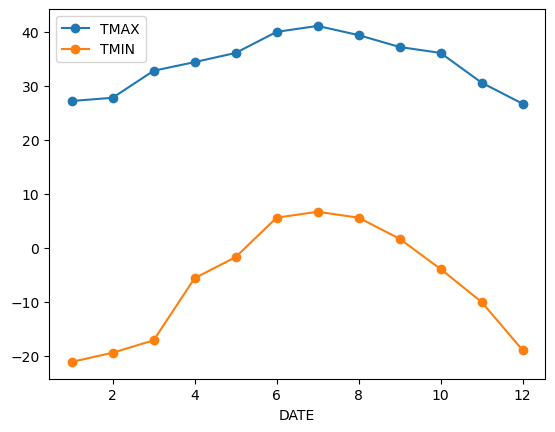

In [93]:
monthly_T_climatology.plot(marker='o')

If we want to do it on a finer scale, we can group by day of year

<Axes: xlabel='DATE'>

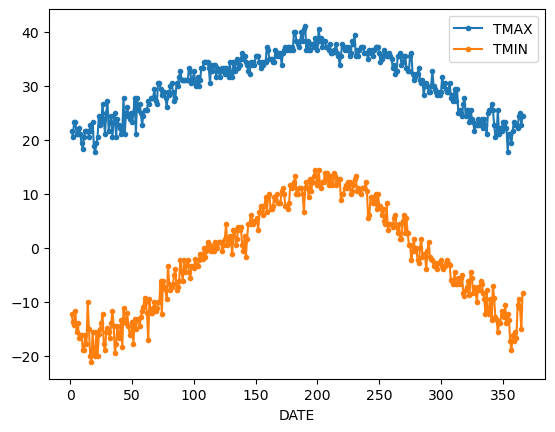

In [37]:
daily_T_climatology = df.groupby(df.index.dayofyear).aggregate({'TMAX': 'max',
                                                              'TMIN': 'min'})
daily_T_climatology.plot(marker='.')

## Missing data and gapfilling

Because timeseries data is ordered and can show periodic variation (e.g. seasonal, daily, annual) dealing with missing data is very important.

Take precipitation data for example. 

<Axes: xlabel='Precipitation (mm)', ylabel='Frequency'>

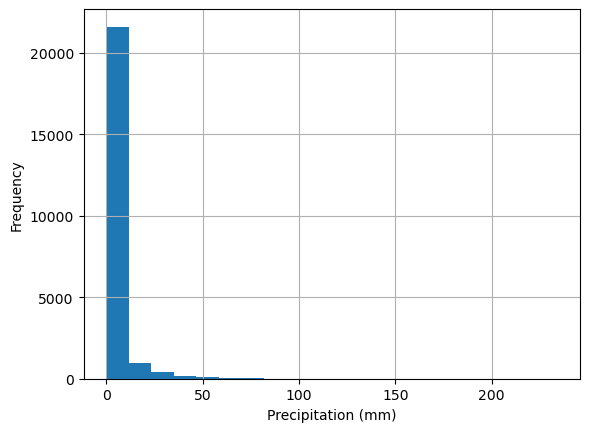

In [38]:
df['PRCP'].plot(kind='hist',ylabel='Frequency', xlabel='Precipitation (mm)', bins=20, grid = True)

Because rainfall is intermittent and the majority of days are dry, rainfall is typically reported as annual or monthly 
Let's look at the period between 1980 and 2000. 

<Axes: title={'center': 'Total Precipitation by Year (1980-2000)'}, xlabel='Year', ylabel='Total Precipitation (mm)'>

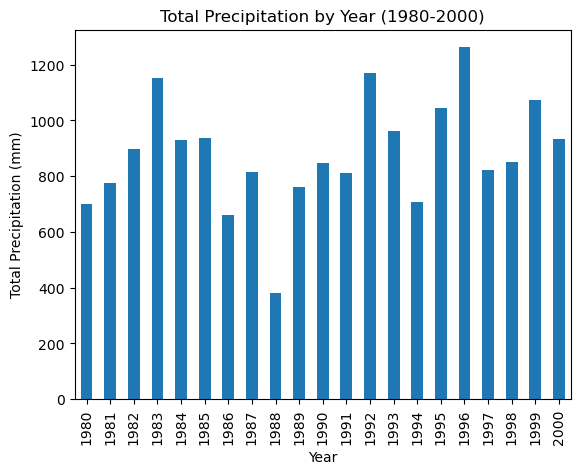

In [39]:
df_20_years = df.loc['1980':'2000']
df_20_years.groupby(df_20_years.index.year)['PRCP'].sum().plot(kind='bar',xlabel='Year', ylabel='Total Precipitation (mm)', title='Total Precipitation by Year (1980-2000)')   

Using the data as is, it appears that 1988 and 1994 were unusually dry. 

We can check the same period for missing data. The `.isna()` method returns `True` when data is missing (i.e. `NaN`). We can also use the feature that `True` is counted as 1 and `False` as 0. 

So the below code, produces a series with `True` for missing days and `False` for days with data. The `True`s are then summed up.

<Axes: title={'center': 'Missing Data by Year (1980-2000)'}, xlabel='DATE', ylabel='Number of Missing Days'>

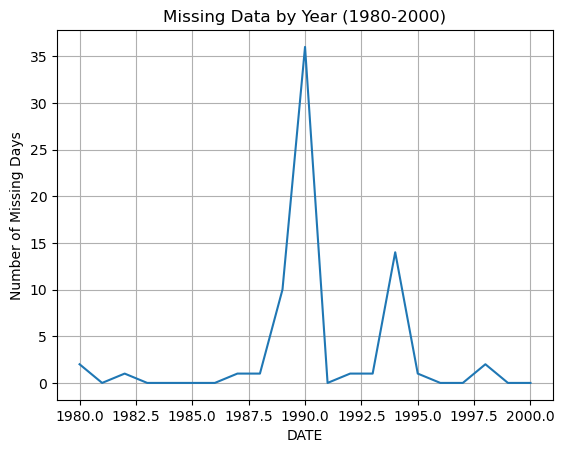

In [40]:
df_20_years['PRCP'].isna().groupby(df_20_years.index.year).sum().plot(grid=True, ylabel='Number of Missing Days', title='Missing Data by Year (1980-2000)')

Pandas has built in methods for filling in missing data. The simplest is to fill in a constant value, such as the mean, median, or zero. 

For example, we can fill in missing precipitation values with the average rainfall 

In [123]:
df_20_years['PRCP'].mean()

np.float64(2.4337458854509544)

<Axes: title={'center': 'Total Precipitation by Year (1980-2000) Gapfilled with Mean'}, xlabel='Year', ylabel='Total Precipitation (mm)'>

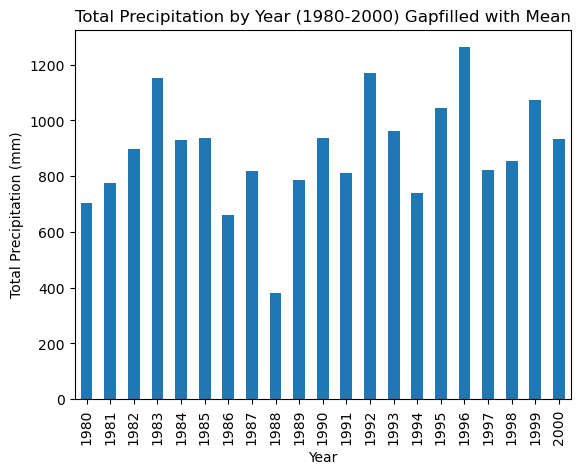

In [41]:
df_20_years_filled = df_20_years['PRCP'].fillna(df_20_years['PRCP'].mean()) 
df_20_years_filled.groupby(df_20_years_filled.index.year).sum().plot(kind='bar',xlabel='Year', ylabel='Total Precipitation (mm)', title='Total Precipitation by Year (1980-2000) Gapfilled with Mean')   

This did not change the result much. Gapfilling is difficult without knowing the dataset very well. For example, the missing data in 1998 could have missed by chance some of the largest rainshowers of the year so that adding the average rainfall makes little different. 

Pandas offers several ways of dealing with missing data. 

- **Interpolation**: [`df.interpolate(method = 'linear', ...)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate) fills `NaN` values using an interpolation method. There are several methods available including `linear`, `splines`, ...
- **Forward fill**: [`df.ffill()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html#pandas.DataFrame.ffill) fills `NaN` values by propagating the last valid observation to next valid.
- **Backward fill**: [`df.bfill()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.bfill.html#pandas.DataFrame.bfill)
- **Remove rows with NaN**: [`df.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) simply removes any rows that contain `NaN` values. This is not recommended for time series data. 

In reality each of these methods will only work for small numbers of missing data.